<a href="https://colab.research.google.com/github/spireon-ex10/Handwritten-digit-recognition-KERAS/blob/master/1st_Conv_DNN_99_52_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


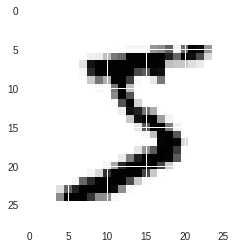

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

In [7]:
y_train[:10]

array([4, 2, 7, 7, 8, 7, 4, 0, 9, 8], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation,MaxPooling2D,BatchNormalization
model = Sequential()

#apply a 3x3 convolution with 32 output filters(channel which filter out) on a 28x28 image:
#filter == kernel == feature extractor
#relu : Rectifier Linear Unit


model.add(Convolution2D(32,(3,3), padding='same', activation='relu', input_shape =(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(32,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Convolution2D(64,(3,3), padding='same', activation='relu', input_shape =(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(64,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64,(5,5), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


 
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 32)        128       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=35, verbose=1, validation_data=(X_val, Y_val))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 54000 samples, validate on 6000 samples
Epoch 1/35
54000/54000 [==============================] - 25s 461us/step - loss: 0.0040 - acc: 0.9986 - val_loss: 3.0610 - val_acc: 0.8028
Epoch 2/35
54000/54000 [==============================] - 23s 430us/step - loss: 0.0042 - acc: 0.9988 - val_loss: 2.3697 - val_acc: 0.8465
Epoch 3/35
54000/54000 [==============================] - 23s 429us/step - loss: 0.0045 - acc: 0.9985 - val_loss: 2.4504 - val_acc: 0.8422
Epoch 4/35
54000/54000 [==============================] - 23s 429us/step - loss: 0.0036 - acc: 0.9989 - val_loss: 2.4529 - val_acc: 0.8423
Epoch 5/35
54000/54000 [==============================] - 23s 426us/step - loss: 0.0039 - acc: 0.9987 - val_loss: 3.3410 - val_acc: 0.7893
Epoch 6/35
54000/54000 [==============================] - 23s 428us/step - loss: 0.0043 - acc: 0.9985 - val_loss: 3.1431 - val_acc: 0.8010
Epoch 7/35
54000/54000 [==============================] - 23s 428us/step - loss: 0.0035 - acc: 0.9990 - val_loss: 3.0

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
print(score)

[0.029469053408025116, 0.9952]


In [0]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[3.71635686e-23 6.83541775e-18 1.04487529e-19 3.04920797e-18
  2.14768502e-12 2.34163185e-17 5.63535914e-23 1.00000000e+00
  3.36882035e-20 1.05061732e-14]
 [8.22903179e-18 6.24643010e-19 1.00000000e+00 1.41626518e-21
  1.15666030e-18 2.59543706e-29 5.10525974e-16 5.08082565e-21
  1.06753403e-19 7.96895674e-23]
 [2.46570986e-14 1.00000000e+00 8.84322658e-14 3.24008195e-14
  8.70487544e-15 8.79846543e-12 1.34306066e-10 2.61396070e-12
  1.98196320e-11 1.59476021e-17]
 [1.00000000e+00 7.19065925e-21 6.87057509e-19 1.12585421e-22
  2.45276884e-21 6.21204304e-20 2.14887812e-15 2.10835831e-17
  1.12989695e-17 2.38492962e-18]
 [4.00757413e-25 2.16879001e-16 2.53248231e-21 1.52328116e-25
  1.00000000e+00 2.59707312e-20 9.43985050e-18 7.21729560e-19
  7.53285855e-17 1.32221626e-13]
 [5.80383079e-15 1.00000000e+00 2.07488860e-16 8.24955960e-17
  1.45100691e-14 1.14337462e-14 1.03018559e-12 4.70065098e-11
  8.35207944e-12 1.25954977e-16]
 [7.25262076e-27 3.79910794e-15 1.32173102e-22 6.69811375e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

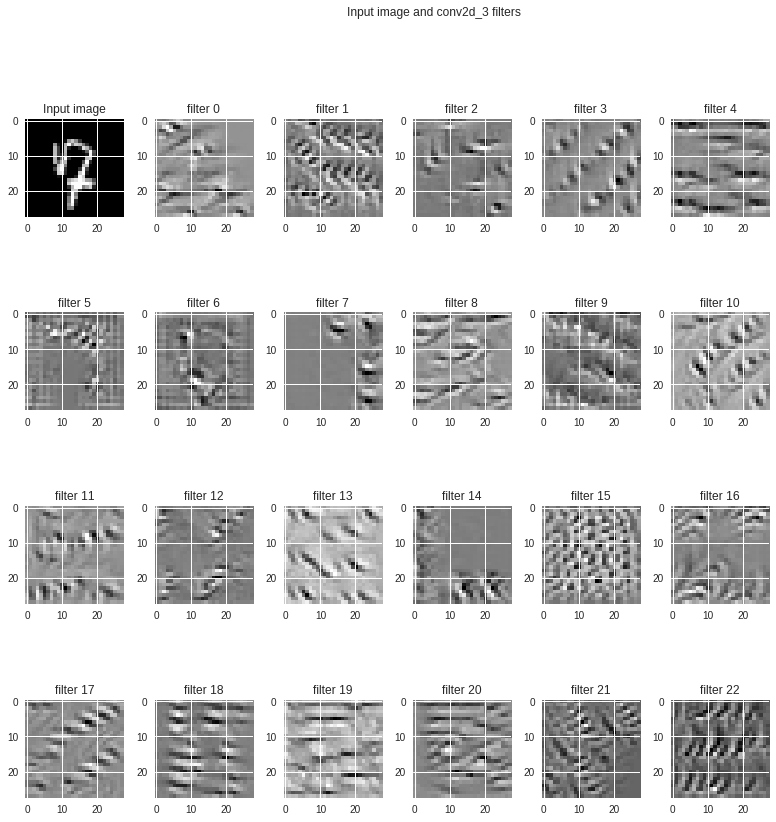

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()